In [1]:
import boto3
import botocore
from iterdub import iterdub as ib
import matplotlib.pyplot as plt
import pandas as pd
from pandas.util import hash_pandas_object
from scipy import stats
import seaborn as sns
from teeplot import teeplot as tp

# get data

In [2]:
s3_handle = boto3.resource(
    's3',
    region_name="us-east-2",
    config=botocore.config.Config(
        signature_version=botocore.UNSIGNED,
    ),
)
bucket_handle = s3_handle.Bucket('prq49')

series_profiles, = bucket_handle.objects.filter(
    Prefix=f'endeavor=16/series-profiles/stage=8+what=elaborated/',
)

In [3]:
df = pd.read_csv(
    f's3://prq49/{series_profiles.key}',
    compression='xz',
)
dfdigest = '{:x}'.format( hash_pandas_object( df ).sum() )
dfdigest

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (261,262,265,266,268,275,276,277,278,280,281,282,283,289,290,291,292,293,299,300,301,308,309,310,311,340,342,344,345,346,349,350,351,357,359,360,361,362,367,368,369,370,397,398,399,400,401,402,403,404,405,406,407,408,421,422,423,424,425,426,427,428,429,430,431,432,907,908) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


'-343fa9a328fb4fa'

In [4]:
for stint in df['Stint'].unique():
    exec(f'df{stint} = df[ df["Stint"] == {stint} ]')

In [5]:
dfm10 = df[ df['Stint'] % 10 == 0 ]

# how do robustness (fraction deleterious) and mutation accumulation relate?

teeplots/bucket=prq49+endeavor=16+transform=identity+viz=regplot+x=fraction-mutations-that-are-deleterious+y=mutation-accumulation+_dfdigest=-343fa9a328fb4fa+ext=.pdf
teeplots/bucket=prq49+endeavor=16+transform=identity+viz=regplot+x=fraction-mutations-that-are-deleterious+y=mutation-accumulation+_dfdigest=-343fa9a328fb4fa+ext=.png


<AxesSubplot:xlabel='Fraction Mutations that are Deleterious', ylabel='Mutation Accumulation'>

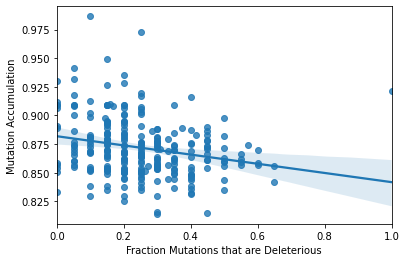

In [6]:
tp.tee(
    sns.regplot,
    data=df,
    x='Fraction Mutations that are Deleterious',
    y='Mutation Accumulation',
    teeplot_outattrs={
        'bucket' : ib.dub( df['Bucket'] ),
        'endeavor' : ib.dub( df['Endeavor'] ),
        'transform' : 'identity',
        '_dfdigest' : dfdigest,
    },
)

teeplots/bucket=prq49+endeavor=16+transform=filter-Stint-40+viz=regplot+x=fraction-mutations-that-are-deleterious+y=mutation-accumulation+_dfdigest=-343fa9a328fb4fa+ext=.pdf
teeplots/bucket=prq49+endeavor=16+transform=filter-Stint-40+viz=regplot+x=fraction-mutations-that-are-deleterious+y=mutation-accumulation+_dfdigest=-343fa9a328fb4fa+ext=.png


(0.09853048676802675, 0.5506690160832141)

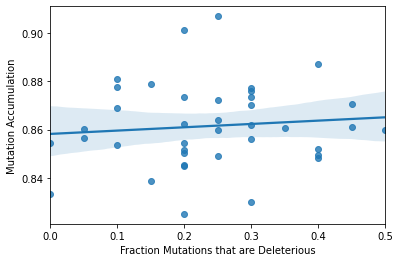

In [7]:
tp.tee(
    sns.regplot,
    data=df40,
    x='Fraction Mutations that are Deleterious',
    y='Mutation Accumulation',
    teeplot_outattrs={
        'bucket' : ib.dub( df['Bucket'] ),
        'endeavor' : ib.dub( df['Endeavor'] ),
        'transform' : 'filter-Stint-40',
        '_dfdigest' : dfdigest,
    },
)

fil = df40.dropna(
    subset=[
        'Fraction Mutations that are Deleterious',
        'Mutation Accumulation',
    ],
)
stats.pearsonr(
    fil['Fraction Mutations that are Deleterious'],
    fil['Mutation Accumulation'],
)

teeplots/bucket=prq49+endeavor=16+transform=groupby-Series-mean+viz=regplot+x=fraction-mutations-that-are-deleterious+y=mutation-accumulation+_dfdigest=-343fa9a328fb4fa+ext=.pdf
teeplots/bucket=prq49+endeavor=16+transform=groupby-Series-mean+viz=regplot+x=fraction-mutations-that-are-deleterious+y=mutation-accumulation+_dfdigest=-343fa9a328fb4fa+ext=.png


(-0.11621862687942823, 0.475135136702028)

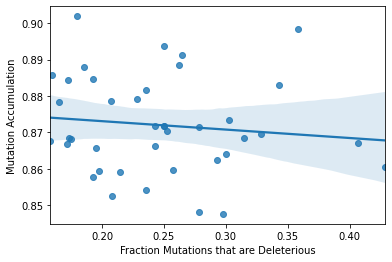

In [8]:
groupby_Series_mean_df = df.groupby('Series').mean()
tp.tee(
    sns.regplot,
    data=groupby_Series_mean_df,
    x='Fraction Mutations that are Deleterious',
    y='Mutation Accumulation',
    teeplot_outattrs={
        'bucket' : ib.dub( df['Bucket'] ),
        'endeavor' : ib.dub( df['Endeavor'] ),
        'transform' : 'groupby-Series-mean',
        '_dfdigest' : dfdigest,
    },
)
stats.pearsonr(
    df.groupby('Series')['Fraction Mutations that are Deleterious'].mean(),
    df.groupby('Series')['Mutation Accumulation'].mean(),
)

# how do robustness (mean differential) and mutation accumulation relate?

teeplots/bucket=prq49+endeavor=16+transform=identity+viz=regplot+x=mean-mutant-fitness-differential+y=mutation-accumulation+_dfdigest=-343fa9a328fb4fa+ext=.pdf
teeplots/bucket=prq49+endeavor=16+transform=identity+viz=regplot+x=mean-mutant-fitness-differential+y=mutation-accumulation+_dfdigest=-343fa9a328fb4fa+ext=.png


<AxesSubplot:xlabel='Mean Mutant Fitness Differential', ylabel='Mutation Accumulation'>

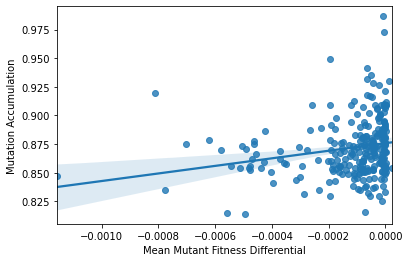

In [9]:
tp.tee(
    sns.regplot,
    data=df,
    x='Mean Mutant Fitness Differential',
    y='Mutation Accumulation',
    teeplot_outattrs={
        'bucket' : ib.dub( df['Bucket'] ),
        'endeavor' : ib.dub( df['Endeavor'] ),
        'transform' : 'identity',
        '_dfdigest' : dfdigest,
    },
)

teeplots/bucket=prq49+endeavor=16+transform=filter-Stint-40+viz=regplot+x=mean-mutant-fitness-differential+y=mutation-accumulation+_dfdigest=-343fa9a328fb4fa+ext=.pdf
teeplots/bucket=prq49+endeavor=16+transform=filter-Stint-40+viz=regplot+x=mean-mutant-fitness-differential+y=mutation-accumulation+_dfdigest=-343fa9a328fb4fa+ext=.png


(-0.0030978843493690397, 0.9850669765622868)

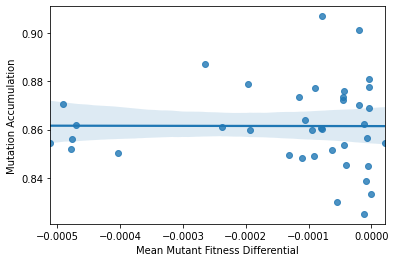

In [10]:
tp.tee(
    sns.regplot,
    data=df40,
    x='Mean Mutant Fitness Differential',
    y='Mutation Accumulation',
    teeplot_outattrs={
        'bucket' : ib.dub( df['Bucket'] ),
        'endeavor' : ib.dub( df['Endeavor'] ),
        'transform' : 'filter-Stint-40',
        '_dfdigest' : dfdigest,
    },
)

fil = df40.dropna(
    subset=[
        'Mean Mutant Fitness Differential',
        'Mutation Accumulation',
    ],
)
stats.pearsonr(
    fil['Mean Mutant Fitness Differential'],
    fil['Mutation Accumulation'],
)

teeplots/bucket=prq49+endeavor=16+transform=groupby-Series-mean+viz=regplot+x=mean-mutant-fitness-differential+y=mutation-accumulation+_dfdigest=-343fa9a328fb4fa+ext=.pdf
teeplots/bucket=prq49+endeavor=16+transform=groupby-Series-mean+viz=regplot+x=mean-mutant-fitness-differential+y=mutation-accumulation+_dfdigest=-343fa9a328fb4fa+ext=.png


(0.4043242026153448, 0.00966421270773749)

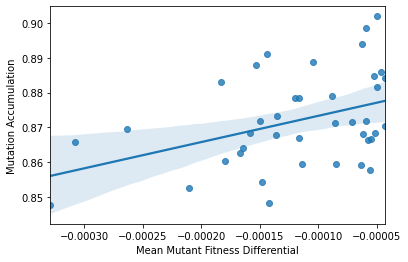

In [11]:
groupby_Series_mean_df = df.groupby('Series').mean()
tp.tee(
    sns.regplot,
    data=groupby_Series_mean_df,
    x='Mean Mutant Fitness Differential',
    y='Mutation Accumulation',
    teeplot_outattrs={
        'bucket' : ib.dub( df['Bucket'] ),
        'endeavor' : ib.dub( df['Endeavor'] ),
        'transform' : 'groupby-Series-mean',
        '_dfdigest' : dfdigest,
    },
)
stats.pearsonr(
    df.groupby('Series')['Mean Mutant Fitness Differential'].mean(),
    df.groupby('Series')['Mutation Accumulation'].mean(),
)

# how do robustness (mutaing mutant differential) and mutation accumulation relate?

teeplots/bucket=prq49+endeavor=16+transform=identity+viz=regplot+x=mean-mutating-mutant-fitness-differential+y=mutation-accumulation+_dfdigest=-343fa9a328fb4fa+ext=.pdf
teeplots/bucket=prq49+endeavor=16+transform=identity+viz=regplot+x=mean-mutating-mutant-fitness-differential+y=mutation-accumulation+_dfdigest=-343fa9a328fb4fa+ext=.png


<AxesSubplot:xlabel='Mean Mutating Mutant Fitness Differential', ylabel='Mutation Accumulation'>

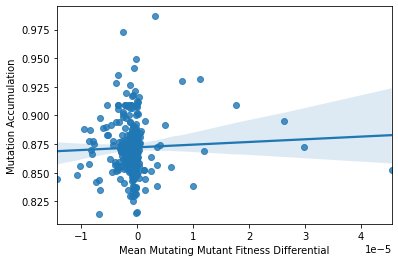

In [12]:
tp.tee(
    sns.regplot,
    data=df,
    x='Mean Mutating Mutant Fitness Differential',
    y='Mutation Accumulation',
    teeplot_outattrs={
        'bucket' : ib.dub( df['Bucket'] ),
        'endeavor' : ib.dub( df['Endeavor'] ),
        'transform' : 'identity',
        '_dfdigest' : dfdigest,
    },
)

teeplots/bucket=prq49+endeavor=16+transform=filter-Stint-40+viz=regplot+x=mean-mutating-mutant-fitness-differential+y=mutation-accumulation+_dfdigest=-343fa9a328fb4fa+ext=.pdf
teeplots/bucket=prq49+endeavor=16+transform=filter-Stint-40+viz=regplot+x=mean-mutating-mutant-fitness-differential+y=mutation-accumulation+_dfdigest=-343fa9a328fb4fa+ext=.png


(-0.07502256697989104, 0.649891426565855)

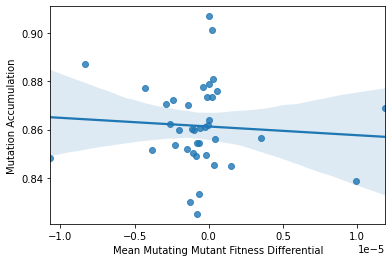

In [13]:
tp.tee(
    sns.regplot,
    data=df40,
    x='Mean Mutating Mutant Fitness Differential',
    y='Mutation Accumulation',
    teeplot_outattrs={
        'bucket' : ib.dub( df['Bucket'] ),
        'endeavor' : ib.dub( df['Endeavor'] ),
        'transform' : 'filter-Stint-40',
        '_dfdigest' : dfdigest,
    },
)

fil = df40.dropna(
    subset=[
        'Mean Mutating Mutant Fitness Differential',
        'Mutation Accumulation',
    ],
)
stats.pearsonr(
    fil['Mean Mutating Mutant Fitness Differential'],
    fil['Mutation Accumulation'],
)

teeplots/bucket=prq49+endeavor=16+transform=groupby-Series-mean+viz=regplot+x=mean-mutating-mutant-fitness-differential+y=mutation-accumulation+_dfdigest=-343fa9a328fb4fa+ext=.pdf
teeplots/bucket=prq49+endeavor=16+transform=groupby-Series-mean+viz=regplot+x=mean-mutating-mutant-fitness-differential+y=mutation-accumulation+_dfdigest=-343fa9a328fb4fa+ext=.png


(-0.01130650904522168, 0.9447960061418723)

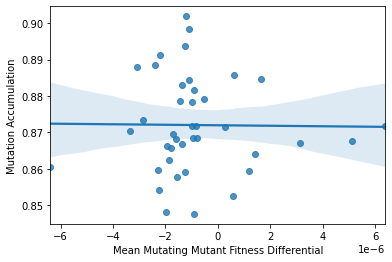

In [14]:
groupby_Series_mean_df = df.groupby('Series').mean()
tp.tee(
    sns.regplot,
    data=groupby_Series_mean_df,
    x='Mean Mutating Mutant Fitness Differential',
    y='Mutation Accumulation',
    teeplot_outattrs={
        'bucket' : ib.dub( df['Bucket'] ),
        'endeavor' : ib.dub( df['Endeavor'] ),
        'transform' : 'groupby-Series-mean',
        '_dfdigest' : dfdigest,
    },
)
stats.pearsonr(
    df.groupby('Series')['Mean Mutating Mutant Fitness Differential'].mean(),
    df.groupby('Series')['Mutation Accumulation'].mean(),
)

# how do robustness (frac deleterious mutaing mutant) and mutation accumulation relate?

teeplots/bucket=prq49+endeavor=16+transform=identity+viz=regplot+x=fraction-mutating-mutations-that-are-deleterious+y=mutation-accumulation+_dfdigest=-343fa9a328fb4fa+ext=.pdf
teeplots/bucket=prq49+endeavor=16+transform=identity+viz=regplot+x=fraction-mutating-mutations-that-are-deleterious+y=mutation-accumulation+_dfdigest=-343fa9a328fb4fa+ext=.png


<AxesSubplot:xlabel='Fraction Mutating Mutations that are Deleterious', ylabel='Mutation Accumulation'>

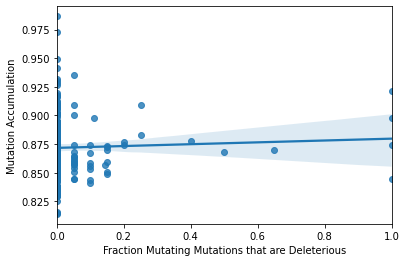

In [15]:
tp.tee(
    sns.regplot,
    data=df,
    x='Fraction Mutating Mutations that are Deleterious',
    y='Mutation Accumulation',
    teeplot_outattrs={
        'bucket' : ib.dub( df['Bucket'] ),
        'endeavor' : ib.dub( df['Endeavor'] ),
        'transform' : 'identity',
        '_dfdigest' : dfdigest,
    },
)

teeplots/bucket=prq49+endeavor=16+transform=filter-Stint-40+viz=regplot+x=fraction-mutating-mutations-that-are-deleterious+y=mutation-accumulation+_dfdigest=-343fa9a328fb4fa+ext=.pdf
teeplots/bucket=prq49+endeavor=16+transform=filter-Stint-40+viz=regplot+x=fraction-mutating-mutations-that-are-deleterious+y=mutation-accumulation+_dfdigest=-343fa9a328fb4fa+ext=.png


(0.13677405535844428, 0.40638293866073916)

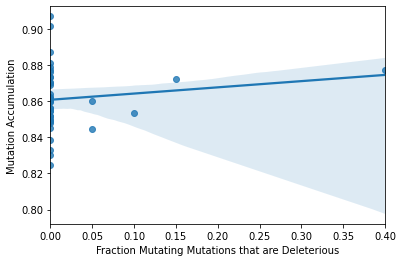

In [16]:
tp.tee(
    sns.regplot,
    data=df40,
    x='Fraction Mutating Mutations that are Deleterious',
    y='Mutation Accumulation',
    teeplot_outattrs={
        'bucket' : ib.dub( df['Bucket'] ),
        'endeavor' : ib.dub( df['Endeavor'] ),
        'transform' : 'filter-Stint-40',
        '_dfdigest' : dfdigest,
    },
)

fil = df40.dropna(
    subset=[
        'Fraction Mutating Mutations that are Deleterious',
        'Mutation Accumulation',
    ],
)
stats.pearsonr(
    fil['Fraction Mutating Mutations that are Deleterious'],
    fil['Mutation Accumulation'],
)

teeplots/bucket=prq49+endeavor=16+transform=groupby-Series-mean+viz=regplot+x=fraction-mutating-mutations-that-are-deleterious+y=mutation-accumulation+_dfdigest=-343fa9a328fb4fa+ext=.pdf
teeplots/bucket=prq49+endeavor=16+transform=groupby-Series-mean+viz=regplot+x=fraction-mutating-mutations-that-are-deleterious+y=mutation-accumulation+_dfdigest=-343fa9a328fb4fa+ext=.png


(0.28529077135722664, 0.07435668515134052)

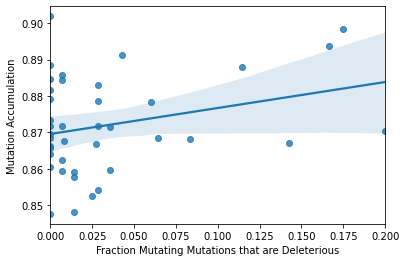

In [17]:
groupby_Series_mean_df = df.groupby('Series').mean()
tp.tee(
    sns.regplot,
    data=groupby_Series_mean_df,
    x='Fraction Mutating Mutations that are Deleterious',
    y='Mutation Accumulation',
    teeplot_outattrs={
        'bucket' : ib.dub( df['Bucket'] ),
        'endeavor' : ib.dub( df['Endeavor'] ),
        'transform' : 'groupby-Series-mean',
        '_dfdigest' : dfdigest,
    },
)
stats.pearsonr(
    df.groupby('Series')['Fraction Mutating Mutations that are Deleterious'].mean(),
    df.groupby('Series')['Mutation Accumulation'].mean(),
)